In [75]:
#Cleaning of text column completed before this step using Dataiku Text Preparation Plugin
#Resources: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6

In [78]:
#Import Libraries
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

import os

# Import the wordcloud library
from wordcloud import WordCloud

#LDA/NLTK
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#hide warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dataiku/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Read recipe inputs
Text_Cleaned = dataiku.Dataset("Text_Cleaned")
Text_Cleaned_df = Text_Cleaned.get_dataframe()
Text_Cleaned_df

,SE_DOWNTIMETYPE,SE_SUBJECT_concat_cleaned
0,Other,pr bl da63 control cppcontainer go shutdown pr...
1,Scheduling,bl ape2 tp statistic waiting end execution inc...
2,Technical,slt test please ignore pr bl totalpowerprocess...
3,Weather,bad wather bad weather bad weather shutdown ac...


#### Examine Each Row

##### Other

In [49]:
OTHER = Text_Cleaned_df.loc[Text_Cleaned_df['SE_DOWNTIMETYPE'] == 'Other']
#print(OTHER)

OTHER_TEXT = OTHER['SE_SUBJECT_concat_cleaned']
OTHER_TEXT = OTHER_TEXT.values[0]
OTHER_TEXT

"pr bl da63 control cppcontainer go shutdown pr bl failed activate component control array001 totalpowerprocessor',pr bl interferometric point fail getinterferometryoffshoot alma-10_6_0-b-2014 00,pr6 tp not work fdm acs cm05 container crash array dv08 mount subreflector power failure pr1 bl correlator resource conflict receive callbacks expect 3',other da62 high tsys value da58 not lock band7,other da47 not lock band7,pr1 bl correlator resource conflict receive callbacks expect 3',pr1 bl corr cdp_node n16 lp fail stop continue stop sequence ,other dv06 sudden servo failure axis ,other da47 fail lock band 6.,other cm03 cm05 cm12 cm07 container crash time handover control go error dv09 fe wca3 show weird status failed activate component control array /totalpowerprocessor tfint pm01 beam distortion pr1 bl correlator resourse conflict value exception throw clustercommander.cpp:244 little node fail execute method startsubscansequence),other dv06 acd little motor not position',other da49 acu

##### Scheduling

In [30]:
SCHEDULING = Text_Cleaned_df.loc[Text_Cleaned_df['SE_DOWNTIMETYPE'] == 'Scheduling']
#print(SCHEDULING)

SCHEDULING_TEXT = SCHEDULING['SE_SUBJECT_concat_cleaned']
SCHEDULING_TEXT = SCHEDULING_TEXT.values[0]
SCHEDULING_TEXT

'bl ape2 tp statistic waiting end execution include pm antenna aca array waiting min right time start time constrained project 2017.a.00035.s/3fgl_j04_a_06_tm1,waiting ddt project ,vir continuous bad weather vir continuous bad weather wait finish include tp array cai aca tp without project antennas bl),waiting time critical observation 01:30utc no time schedule ,queue gap shift end shift end queue gap shift end shift end ape2 tp scheduling time queue gap),no project aca tp aca_tp test start 22:00:00ut queue gap no project aca tp aca_tp shift ending scheduling downtime no tp project eoc project test flag set ape2 tp statistics scheduling queue gap no pi science projects),shift ending shift ending queue gap queue gap queue gap aca tp queue gap shift ending shift ending queue gap queue gap waiting project queue gap waiting project queue gap waiting project queue gap waiting project shift end waiting project shift ending shift ending no tp project available queue gap aca tp no project avai

##### Technical

In [32]:
TECHNICAL = Text_Cleaned_df.loc[Text_Cleaned_df['SE_DOWNTIMETYPE'] == 'Technical']
#print(TECHNICAL)

TECHNICAL_TEXT = TECHNICAL['SE_SUBJECT_concat_cleaned']
TECHNICAL_TEXT = TECHNICAL_TEXT.values[0]
TECHNICAL_TEXT

'slt test please ignore pr bl totalpowerprocessor datacollector error attempt send datum bulkdatareceiver pr1 bl error invoke observe mode pr1 bl da58 not lock b7,other ql focus result not display quicklook spite display telcal da65 drxbbpr3 stop dv17 bbp4 wrong metaframedelay dv08 b7 large/ negative trec value poly pr1 bl dv01 acu not canbus handover da56 not send lo2bbpr0 operational handover bl drxbbpr0 come start antenna pr1 bl error invoke observe mode function timed wait second correlator start sub scan \',other da52 timeout wait connection ifproc datareceiver pr1 bl dv06 displacement sensor redout error high value linear sensor handover da58 el drive not initialize brake disengage time da56 lo2bbpr0 stick stop state pr1 bl da61 drx3 count different value metaframe delay handover da52 shutting digitizer da52:0 processor label da520 not connect ,other da56 baseband bb_1 polar band alma_rb_03 refant cm01 delay u aos bl pr1 da56 high receiver cabin temperature ,pr1 bl dv08 b7 large/

##### Weather

In [33]:
WEATHER = Text_Cleaned_df.loc[Text_Cleaned_df['SE_DOWNTIMETYPE'] == 'Weather']
#print(WEATHER)

WEATHER_TEXT = WEATHER['SE_SUBJECT_concat_cleaned']
WEATHER_TEXT = WEATHER_TEXT.values[0]
WEATHER_TEXT

'bad wather bad weather bad weather shutdown active aos snow chajnantor aos guard call snow highsite ,no cloud camera restart slush snowing guard call light precipitation high site light snow hight site report guard no observation science downtime snowing lightning rain cloudy antennas send survival position ,rain snow bad weather high site snowing again false alarm snow camera light snow snow camera minute far snow bad weather snowing electrical storm),bad weather snow aos white wind aos pr bl dv07 didd\'t lock band 3,bad weather no observations bad weather condition no observation pwr very inastable night ,aos precipitatin high site precipitation aos snowing aos snow aos bad weather bad weather bad weather strong wind wait visual inspection sky bad weather waiting good condition visual inspection weather observation stop bad weather scheduler internal exception control creation array pr2 bl sbex cdpm ptherad mutex timeout bad weather water vapor mm no project availables ,pr aca corre

#### Exploratory Analysis - WordClouds

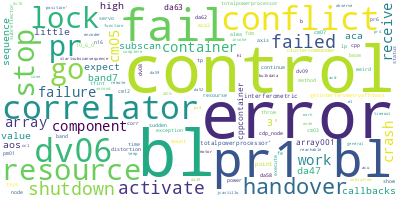

In [34]:
# Create a WordCloud object - OTHER_TEXT
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(OTHER_TEXT)

# Visualize the word cloud
wordcloud.to_image()

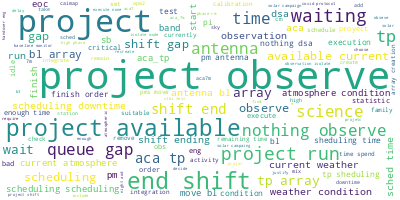

In [35]:
# Create a WordCloud object - SCHEDULING_TEXT
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(SCHEDULING_TEXT)

# Visualize the word cloud
wordcloud.to_image()

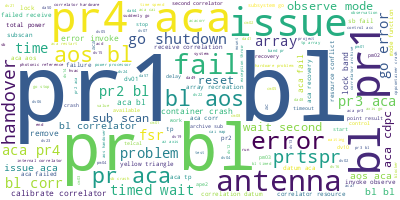

In [36]:
# Create a WordCloud object - TECHNICAL_TEXT
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(TECHNICAL_TEXT)

# Visualize the word cloud
wordcloud.to_image()

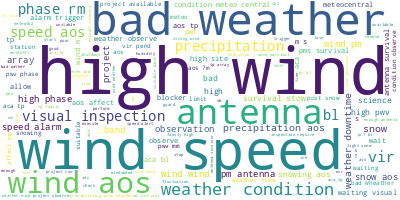

In [42]:
# Create a WordCloud object - WEATHER_TEXT
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(WEATHER_TEXT)

# Visualize the word cloud
wordcloud.to_image()

#### Build Corpus

In [53]:
## Corpus for OTHER_TEXT

# Split string into tokens
tokens = OTHER_TEXT.split()

# Create Dictionary
id2word_OTHER = corpora.Dictionary([tokens])

# Term Document Frequency
corpus_OTHER = [id2word_OTHER.doc2bow(token) for token in [tokens]]

# View
print(corpus_OTHER[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 10), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [54]:
## Corpus for SCHEDULING_TEXT

# Split string into tokens
tokens = SCHEDULING_TEXT.split()

# Create Dictionary
id2word_SCHEDULING = corpora.Dictionary([tokens])

# Term Document Frequency
corpus_SCHEDULING = [id2word_SCHEDULING.doc2bow(token) for token in [tokens]]

# View
print(corpus_SCHEDULING[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 6), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 2), (19, 40), (20, 2), (21, 3), (22, 4), (23, 2), (24, 3), (25, 8), (26, 2), (27, 1), (28, 5), (29, 1)]


In [56]:
## Corpus for TECHNICAL_TEXT

# Split string into tokens
tokens = TECHNICAL_TEXT.split()

# Create Dictionary
id2word_TECHNICAL = corpora.Dictionary([tokens])

# Term Document Frequency
corpus_TECHNICAL = [id2word_TECHNICAL.doc2bow(token) for token in [tokens]]

# View
print(corpus_TECHNICAL[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 5), (5, 3), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 5), (14, 1), (15, 1), (16, 6), (17, 5), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 19), (24, 21), (25, 15), (26, 3), (27, 4), (28, 10), (29, 1)]


In [57]:
## Corpus for WEATHER_TEXT

# Split string into tokens
tokens = WEATHER_TEXT.split()

# Create Dictionary
id2word_WEATHER = corpora.Dictionary([tokens])

# Term Document Frequency
corpus_WEATHER = [id2word_WEATHER.doc2bow(token) for token in [tokens]]

# View
print(corpus_WEATHER[:1][0][:30])

[(0, 1), (1, 1), (2, 3), (3, 5), (4, 2), (5, 4), (6, 2), (7, 1), (8, 1), (9, 1), (10, 5), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 4)]


#### LDA Modeling
- build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic

In [65]:
# number of topics
num_topics = 10

In [66]:
# Build LDA model - OTHER
lda_model_OTHER = gensim.models.LdaMulticore(corpus=corpus_OTHER,
                                       id2word=id2word_OTHER,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_OTHER.print_topics())
doc_lda_OTHER = lda_model_OTHER[corpus_OTHER]

[(0,
  '0.031*"bl" + 0.023*"not" + 0.019*"control" + 0.017*"error" + 0.014*"fail" + '
  '0.014*"dv06" + 0.014*",other" + 0.013*"conflict" + 0.012*"go" + '
  '0.011*"resource"'),
 (1,
  '0.034*"bl" + 0.025*"not" + 0.023*"error" + 0.019*"control" + 0.015*"fail" + '
  '0.014*"dv06" + 0.014*"conflict" + 0.012*"handover" + 0.012*"go" + '
  '0.011*"pr1"'),
 (2,
  '0.020*"bl" + 0.020*"not" + 0.016*"conflict" + 0.016*"control" + '
  '0.014*"error" + 0.014*"dv06" + 0.014*"fail" + 0.013*"correlator" + '
  '0.013*"resource" + 0.011*"pr1"'),
 (3,
  '0.044*"bl" + 0.032*"not" + 0.025*"control" + 0.023*"error" + 0.019*"dv06" + '
  '0.019*"conflict" + 0.018*"fail" + 0.017*"correlator" + 0.016*"stop" + '
  '0.014*"lock"'),
 (4,
  '0.008*"bl" + 0.008*"control" + 0.008*"error" + 0.008*"not" + '
  '0.008*"conflict" + 0.008*"fail" + 0.008*"dv06" + 0.008*"lock" + '
  '0.008*"stop" + 0.008*"handover"'),
 (5,
  '0.048*"bl" + 0.028*"not" + 0.020*"dv06" + 0.020*"conflict" + 0.019*"error" '
  '+ 0.019*"fail" + 0

In [67]:
# Build LDA model - SCHEDULING
lda_model_SCHEDULING = gensim.models.LdaMulticore(corpus=corpus_SCHEDULING,
                                       id2word=id2word_SCHEDULING,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model_SCHEDULING.print_topics())
doc_lda_SCHEDULING = lda_model_SCHEDULING[corpus_SCHEDULING]

[(0,
  '0.116*"no" + 0.078*"project" + 0.061*"observe" + 0.026*"available" + '
  '0.020*"shift" + 0.017*"gap" + 0.017*"end" + 0.016*"time" + 0.015*"tp" + '
  '0.014*"array"'),
 (1,
  '0.203*"no" + 0.131*"project" + 0.083*"observe" + 0.030*"shift" + 0.030*"tp" '
  '+ 0.025*"end" + 0.025*"time" + 0.022*"available" + 0.021*"gap" + '
  '0.019*"array"'),
 (2,
  '0.039*"no" + 0.037*"project" + 0.021*"observe" + 0.009*"shift" + '
  '0.009*"array" + 0.008*"available" + 0.008*"end" + 0.008*"tp" + 0.007*"gap" '
  '+ 0.007*"run"'),
 (3,
  '0.194*"project" + 0.135*"no" + 0.102*"observe" + 0.033*"shift" + '
  '0.031*"end" + 0.030*"tp" + 0.025*"available" + 0.022*"gap" + 0.019*"array" '
  '+ 0.018*"time"'),
 (4,
  '0.050*"no" + 0.046*"project" + 0.037*"observe" + 0.017*"end" + '
  '0.014*"available" + 0.014*"shift" + 0.012*"tp" + 0.010*"gap" + 0.010*"time" '
  '+ 0.009*"array"'),
 (5,
  '0.164*"no" + 0.135*"project" + 0.078*"observe" + 0.033*"available" + '
  '0.033*"end" + 0.033*"shift" + 0.018*"tp

In [68]:
# Build LDA model - TECHNICAL
lda_model_TECHNICAL = gensim.models.LdaMulticore(corpus=corpus_TECHNICAL,
                                       id2word=id2word_TECHNICAL,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model_TECHNICAL.print_topics())
doc_lda_TECHNICAL = lda_model_TECHNICAL[corpus_TECHNICAL]

[(0,
  '0.061*"bl" + 0.045*"aca" + 0.023*"not" + 0.019*"aos" + 0.018*"pr1" + '
  '0.016*"fail" + 0.015*"error" + 0.014*"issue" + 0.014*"antenna" + '
  '0.013*"pr"'),
 (1,
  '0.057*"bl" + 0.054*"aca" + 0.023*"not" + 0.021*"pr1" + 0.018*"pr" + '
  '0.017*"aos" + 0.016*"issue" + 0.014*"correlator" + 0.013*"fail" + '
  '0.013*"error"'),
 (2,
  '0.060*"bl" + 0.058*"aca" + 0.021*"not" + 0.017*"fail" + 0.016*"pr1" + '
  '0.013*"issue" + 0.012*"aos" + 0.012*"go" + 0.012*"pr" + 0.011*"error"'),
 (3,
  '0.054*"bl" + 0.045*"aca" + 0.020*"not" + 0.017*"pr1" + 0.014*"pr" + '
  '0.014*"aos" + 0.013*"error" + 0.012*"fail" + 0.011*"issue" + '
  '0.011*"antenna"'),
 (4,
  '0.058*"bl" + 0.039*"aca" + 0.027*"not" + 0.025*"pr1" + 0.015*"aos" + '
  '0.015*"pr" + 0.015*"issue" + 0.014*"fail" + 0.014*"array" + 0.013*"error"'),
 (5,
  '0.058*"aca" + 0.051*"bl" + 0.024*"not" + 0.017*"aos" + 0.017*"error" + '
  '0.016*"pr1" + 0.015*"issue" + 0.015*"pr" + 0.014*"fail" + 0.011*"antenna"'),
 (6,
  '0.073*"bl" + 0.

In [69]:
# Build LDA model - WEATHER
lda_model_WEATHER = gensim.models.LdaMulticore(corpus=corpus_WEATHER,
                                       id2word=id2word_WEATHER,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model_WEATHER.print_topics())
doc_lda_WEATHER = lda_model_WEATHER[corpus_WEATHER]

[(0,
  '0.108*"wind" + 0.077*"high" + 0.054*"weather" + 0.050*"aos" + 0.046*"speed" '
  '+ 0.029*"bad" + 0.023*"antenna" + 0.021*"condition" + 0.018*"no" + '
  '0.017*"snow"'),
 (1,
  '0.106*"wind" + 0.077*"high" + 0.061*"weather" + 0.060*"aos" + 0.044*"speed" '
  '+ 0.034*"bad" + 0.027*"antenna" + 0.021*"condition" + 0.019*"snow" + '
  '0.018*"precipitation"'),
 (2,
  '0.124*"wind" + 0.068*"high" + 0.048*"aos" + 0.047*"weather" + 0.038*"speed" '
  '+ 0.033*"bad" + 0.020*"antenna" + 0.019*"condition" + 0.017*"precipitation" '
  '+ 0.014*"bl"'),
 (3,
  '0.118*"wind" + 0.055*"aos" + 0.048*"weather" + 0.047*"high" + 0.037*"speed" '
  '+ 0.035*"bad" + 0.021*"antenna" + 0.020*"condition" + 0.020*"no" + '
  '0.018*"snow"'),
 (4,
  '0.083*"wind" + 0.053*"high" + 0.049*"weather" + 0.042*"aos" + 0.030*"speed" '
  '+ 0.027*"bad" + 0.021*"antenna" + 0.020*"condition" + 0.014*"snow" + '
  '0.014*"precipitation"'),
 (5,
  '0.060*"wind" + 0.042*"aos" + 0.034*"high" + 0.029*"speed" + 0.021*"weather" 

__________________

In [0]:

# Write recipe outputs
#Topic_Modeling2 = dataiku.Dataset("Topic_Modeling2")
#Topic_Modeling2.write_with_schema(Topic_Modeling2_df)

#### TO DO
- look at most common phrases. ex: 'accumulated dish ice', 'no project'